## Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

## Import Data

In [2]:
df_segmentation = pd.read_csv(r'C:\Users\prizz\Desktop\Data courses\365 datascience\365datascience_Customer Analytics in Python\5_Getting to know the Segmentation Dataset\segmentation data.csv', index_col = 0)
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


## Explore Data

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation Estimate

In [5]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


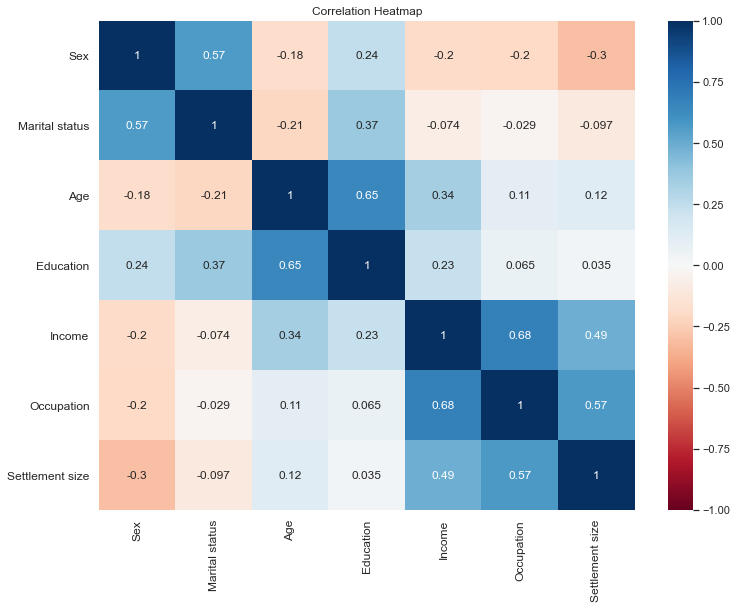

In [6]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(), 
                annot = True, 
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

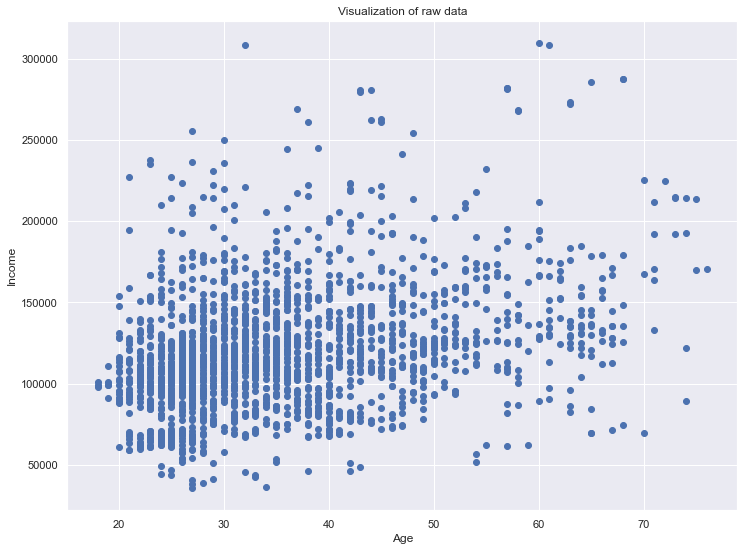

In [7]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

#https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/#iloc-selection

## Standardization

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarchical Clustering 

In [9]:
hier_clust = linkage(segmentation_std, method = 'ward')

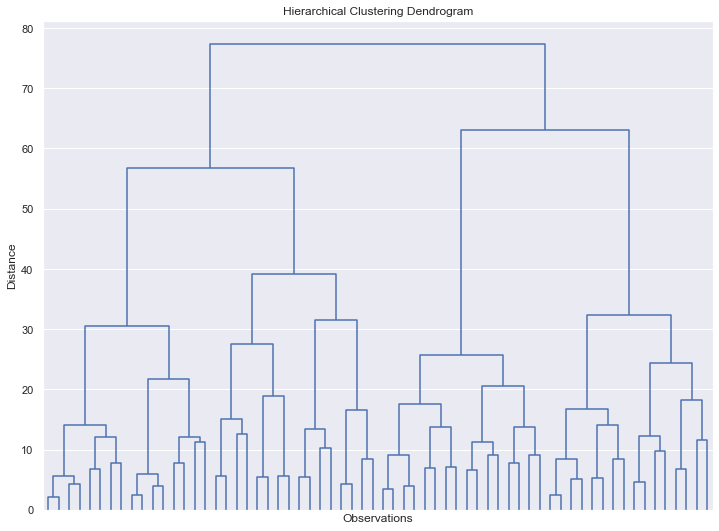

In [10]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True,
           color_threshold = 0)
plt.show()

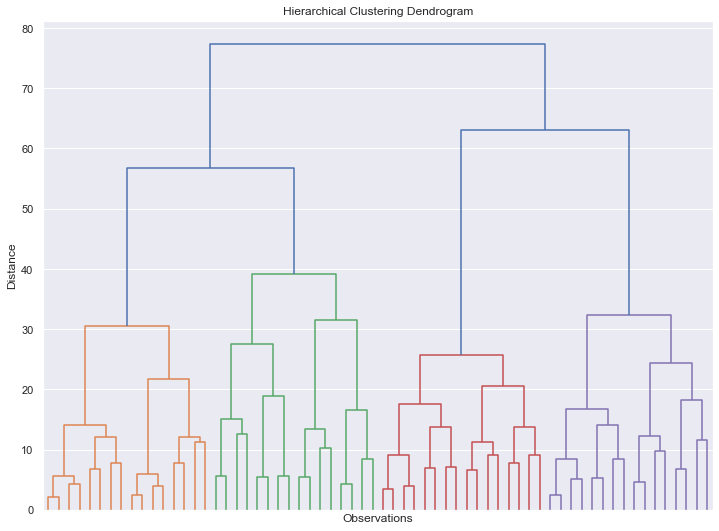

In [11]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

## K-Means Clustering

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

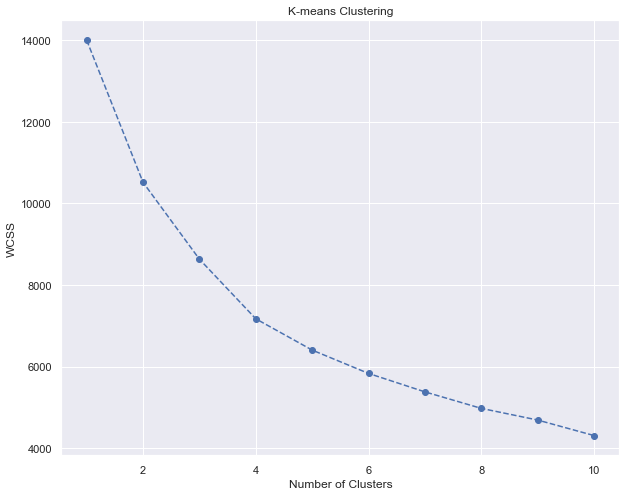

In [13]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [15]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

## Results 

In [16]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [17]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [18]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [19]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [20]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [21]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'career focused',
                         3:'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [22]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                  1:'fewer opportunities',
                                                                  2:'standard',
                                                                  3:'career focused'})

C:\Users\prizz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


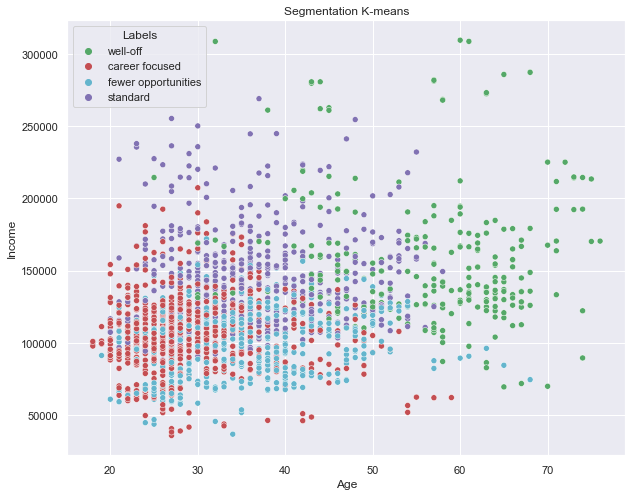

In [23]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis,hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

## PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(segmentation_std)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

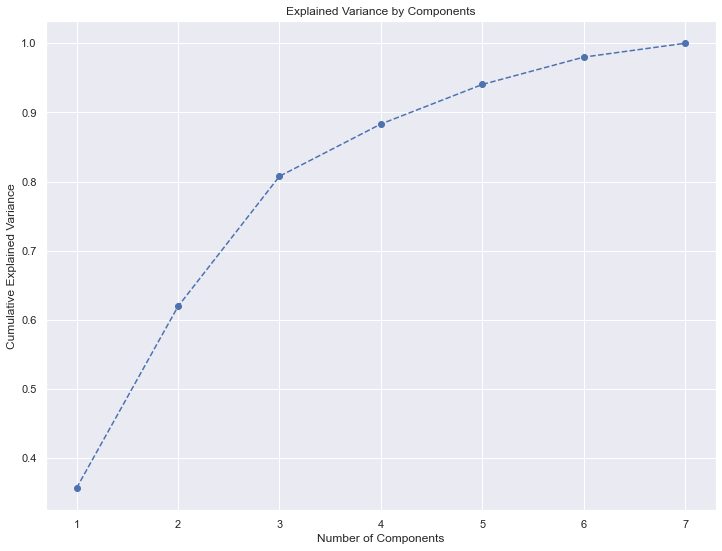

In [27]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [28]:
pca = PCA(n_components = 3)

In [29]:
pca.fit(segmentation_std)

PCA(n_components=3)

## PCA Results

In [30]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [31]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_segmentation.columns.values,
                          index= ['Components 1', 'Components 2', 'Components 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Components 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Components 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Components 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x1699dfbe4c0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

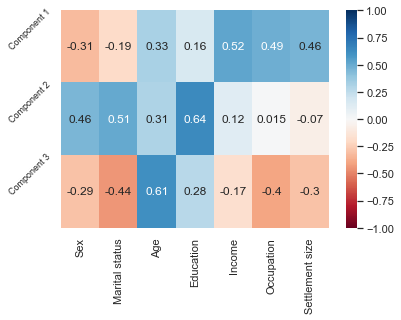

In [32]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0,1,2],
          ['Component 1', 'Component 2', 'Component 3'],
          rotation = 45,
          fontsize = 9)
            
            
        

In [33]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [34]:
scores_pca = pca.transform(segmentation_std)

## K-means clustering with PCA

In [35]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

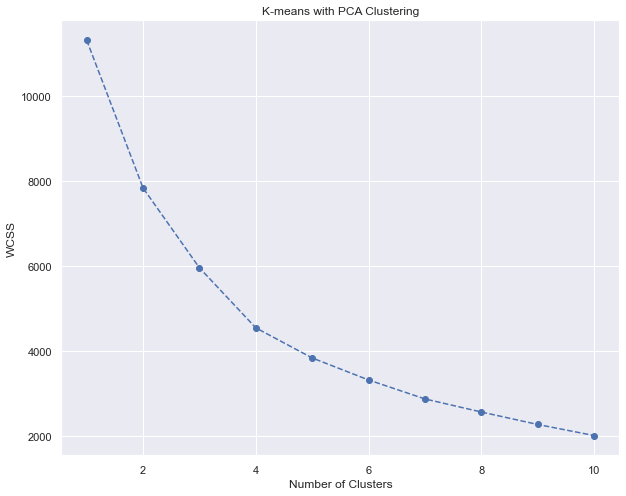

In [36]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [37]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [38]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## K-means clustering with PCA Results

In [39]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [40]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [41]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [42]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'fewer opportunities',
                                                         1:'career focused',
                                                         2:'standard',
                                                         3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
fewer opportunities,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.1315
career focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2310
standard,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.2850
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.3525


In [43]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'fewer opportunities',
                                                                              1:'career focused',
                                                                              2:'standard',
                                                                              3:'well-off'})

C:\Users\prizz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


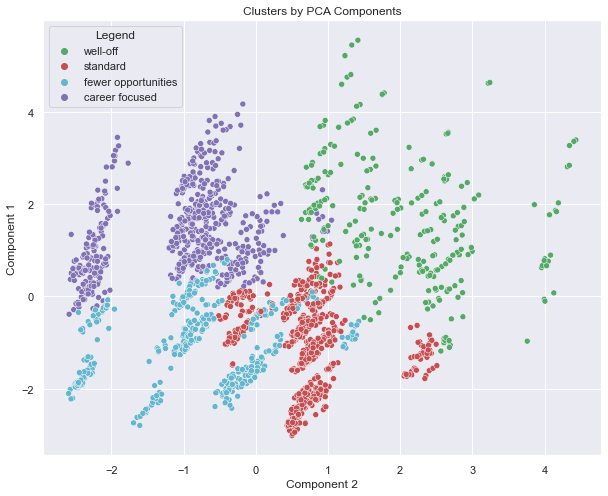

In [44]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\prizz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


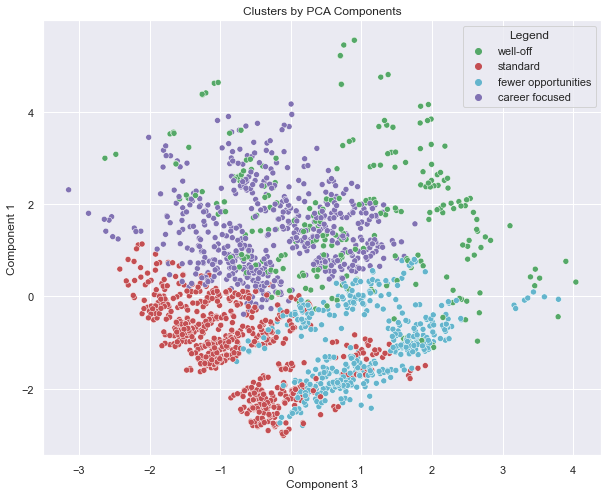

In [45]:
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\prizz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


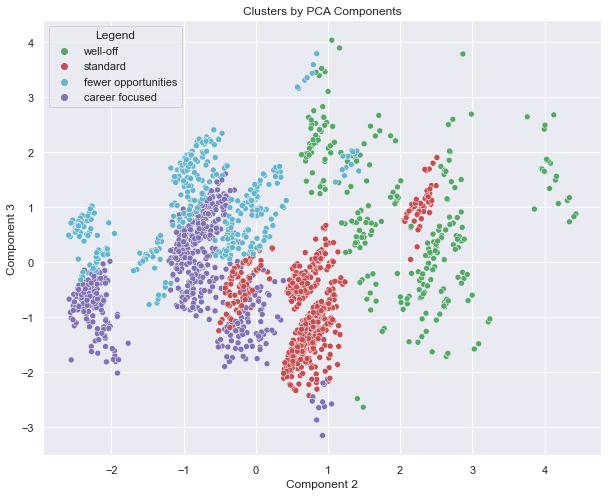

In [46]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

## Data export 

In [47]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [48]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [49]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))